In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
#Analysing area type
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
#Dropping features that are not so important in predicting price of a house
df1 = df.drop(['availability','society','area_type','balcony'],axis = 1)

In [7]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# DATA CLEANING

In [8]:
#checking for Nan rows and either dropping them or filling with mean,median values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2.shape

(13246, 5)

In [11]:
#Analysing size
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df2['bed_rooms'] = df2['size'].apply(lambda x : int( x.split(' ')[0]))

/tmp/ipykernel_4792/676763256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bed_rooms'] = df2['size'].apply(lambda x : int( x.split(' ')[0]))


In [13]:
df2.head()

,location,size,total_sqft,bath,price,bed_rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3 = df2.drop('size', axis =1)

In [15]:
df3.head()

,location,total_sqft,bath,price,bed_rooms
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [16]:
#Analysing total square feet
df3.total_sqft.unique()
#we see that at some point we have ranges instead of a single number

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def range(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [18]:
df3[~df3['total_sqft'].apply(range)].head(10)

,location,total_sqft,bath,price,bed_rooms
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [19]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
sqft_to_num('5-6')

5.5

In [21]:
sqft_to_num('5yards')

In [22]:
df3.head(10)

,location,total_sqft,bath,price,bed_rooms
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
5,Whitefield,1170,2.0,38.00,2
6,Old Airport Road,2732,4.0,204.00,4
7,Rajaji Nagar,3300,4.0,600.00,4
8,Marathahalli,1310,3.0,63.25,3
9,Gandhi Bazar,1020,6.0,370.00,6


In [23]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(sqft_to_num)

In [24]:
df4.head(10)

,location,total_sqft,bath,price,bed_rooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [25]:
df4.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bed_rooms      0
dtype: int64

In [26]:
df4 = df4.dropna()

In [27]:
df4.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bed_rooms     0
dtype: int64

In [28]:
df4.shape

(13200, 5)

# FEATURE ENGINEERING AND DIMENSIONALITY REDUCTION

In [29]:
#feature engineering refers to creation of new features which will be helpful in our prediction
df5 = df4.copy()
df5

,location,total_sqft,bath,price,bed_rooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [30]:
#Converting price to dollars
df5['price'] = df5['price']*100000

In [31]:
#new feature, price per square fit
df5['price_per_sqft'] = df5['price']/df5['total_sqft']

In [32]:
df5

,location,total_sqft,bath,price,bed_rooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,3907000.0,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,12000000.0,4,4615.384615
2,Uttarahalli,1440.0,2.0,6200000.0,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,9500000.0,3,6245.890861
4,Kothanur,1200.0,2.0,5100000.0,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,23100000.0,5,6689.834926
13316,Richards Town,3600.0,5.0,40000000.0,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,6000000.0,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,48800000.0,4,10407.336319


In [33]:
#aiming to converting location to digits but there are so many locations so I have to figure out aw
 #ay of reducing them
len(df5.location.unique())

1298

In [34]:
#removing white spaces
df5.location = df5.location.apply(lambda x : x.strip())

In [35]:
#checking hoow many times a location is referenced
location_ref = df5.groupby('location')['location'].agg('count')#.sort_values(ascending = False)
location_ref.head(50)

location
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas nagar banshankari 3rd stage     1
1A Block Koramangala                                1
1Channasandra                                       1
1Hanuman Nagar                                      1
1Hoysalanagar                                       1
1Kasavanhalli                                       1
1st Block BEL Layout                                2
1st Block HBR Layout                                3
1st Block HRBR Layout                               8
1st Block Jayanagar                                14
1st Block Koramangala                              10
1st Phase JP Nagar                                 24
1st Stage Domlur                                    1
1st Stage Indira Nagar                              5
1st Stage Radha Kri

In [36]:
#Renaming all locations referenced less than 20 times to other
df5.location = df5.location.apply(lambda x : 'other' if x in location_ref[location_ref<20] else x)


In [37]:
len(df5.location.unique())

149

In [38]:
df5.head(20)

,location,total_sqft,bath,price,bed_rooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,3907000.0,2,3699.810606
1,other,2600.0,5.0,12000000.0,4,4615.384615
2,Uttarahalli,1440.0,2.0,6200000.0,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,9500000.0,3,6245.890861
4,Kothanur,1200.0,2.0,5100000.0,2,4250.000000
5,Whitefield,1170.0,2.0,3800000.0,2,3247.863248
6,Old Airport Road,2732.0,4.0,20400000.0,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,60000000.0,4,18181.818182
8,Marathahalli,1310.0,3.0,6325000.0,3,4828.244275
9,other,1020.0,6.0,37000000.0,6,36274.509804


# OUTLIER DETECTION AND REMOVAL

In [39]:
#Given a fact that for every 300 square feet, there fits one bed bad some data points indicate a bed fitting in less than 300
df5[df5.total_sqft/df5.bed_rooms< 300].head() #sum = 744 outliers

,location,total_sqft,bath,price,bed_rooms,price_per_sqft
9,other,1020.0,6.0,37000000.0,6,36274.509804
45,HSR Layout,600.0,9.0,20000000.0,8,33333.333333
58,other,1407.0,4.0,15000000.0,6,10660.980810
68,other,1350.0,7.0,8500000.0,8,6296.296296
70,other,500.0,3.0,10000000.0,3,20000.000000


In [40]:
df5.shape

(13200, 6)

In [41]:
df6 = df5[~(df5.total_sqft/df5.bed_rooms< 300)]
df6

,location,total_sqft,bath,price,bed_rooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,3907000.0,2,3699.810606
1,other,2600.0,5.0,12000000.0,4,4615.384615
2,Uttarahalli,1440.0,2.0,6200000.0,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,9500000.0,3,6245.890861
4,Kothanur,1200.0,2.0,5100000.0,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,23100000.0,5,6689.834926
13316,other,3600.0,5.0,40000000.0,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,6000000.0,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,48800000.0,4,10407.336319


In [42]:
df6.shape

(12456, 6)

In [43]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [44]:
#We are reomoving all p_per_sqft beyond 1 standard dev of the mean

In [45]:
import numpy as np
def outliers_in_ppsft(x):
    my_df = pd.DataFrame()
    for key, subdf in df6.groupby('location'):
        mn = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        target_df = subdf[(subdf.price_per_sqft>(mn-sd)) & (subdf.price_per_sqft<(mn+sd))]
        my_df = pd.concat([my_df,target_df],ignore_index= True)
    return my_df   

In [46]:
df7 = outliers_in_ppsft(df6)

In [47]:
df7.shape

(10418, 6)

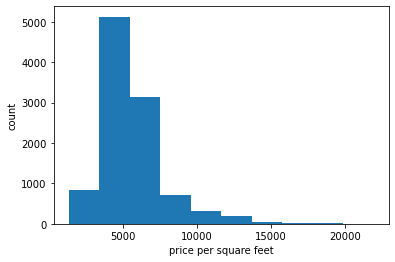

In [48]:
plt.hist(df7.price_per_sqft,rwidth = 1)
plt.xlabel('price per square feet')
plt.ylabel('count')
plt.show()


In [49]:
#Almost archived a normal distribution

In [50]:
#Assuming the number of bathrooms must be equal to number of bedroom or an excess of one
df8 = df7[df7.bath<=df7.bed_rooms+1]

In [51]:
df8

,location,total_sqft,bath,price,bed_rooms,price_per_sqft
0,1st Phase JP Nagar,2825.0,4.0,25000000.0,4,8849.557522
1,1st Phase JP Nagar,1875.0,3.0,16700000.0,3,8906.666667
2,1st Phase JP Nagar,1500.0,5.0,8500000.0,5,5666.666667
3,1st Phase JP Nagar,2065.0,4.0,21000000.0,3,10169.491525
4,1st Phase JP Nagar,2024.0,3.0,15700000.0,3,7756.916996
...,...,...,...,...,...,...
10413,other,1200.0,2.0,14000000.0,2,11666.666667
10414,other,1015.0,2.0,6000000.0,2,5911.330049
10415,other,1075.0,2.0,4800000.0,2,4465.116279
10416,other,1805.0,3.0,13400000.0,3,7423.822715


In [52]:
#Dropping price_per_sqft since it was only used for outlier detection
df8 =  df8.drop('price_per_sqft', axis =1)

In [53]:
df8

,location,total_sqft,bath,price,bed_rooms
0,1st Phase JP Nagar,2825.0,4.0,25000000.0,4
1,1st Phase JP Nagar,1875.0,3.0,16700000.0,3
2,1st Phase JP Nagar,1500.0,5.0,8500000.0,5
3,1st Phase JP Nagar,2065.0,4.0,21000000.0,3
4,1st Phase JP Nagar,2024.0,3.0,15700000.0,3
...,...,...,...,...,...
10413,other,1200.0,2.0,14000000.0,2
10414,other,1015.0,2.0,6000000.0,2
10415,other,1075.0,2.0,4800000.0,2
10416,other,1805.0,3.0,13400000.0,3


In [54]:
#changing location to integers
dummies = pd.get_dummies(df8.location, dtype = int)

In [55]:
dummies

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
#dropping one column on dummies to avoid dummy trap (no all others means that one dropped column)
dummies.drop('other',axis  =1)

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#cocatinating to form new data frame
df9 = pd.concat([df8,dummies],axis = 1)

In [58]:
df9

,location,total_sqft,bath,price,bed_rooms,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1st Phase JP Nagar,2825.0,4.0,25000000.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,16700000.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1500.0,5.0,8500000.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2065.0,4.0,21000000.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,2024.0,3.0,15700000.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,other,1200.0,2.0,14000000.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10414,other,1015.0,2.0,6000000.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10415,other,1075.0,2.0,4800000.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10416,other,1805.0,3.0,13400000.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
df10 = df9.drop('location', axis = 1)
df10

,total_sqft,bath,price,bed_rooms,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,2825.0,4.0,25000000.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,16700000.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,8500000.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,21000000.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,15700000.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,1200.0,2.0,14000000.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10414,1015.0,2.0,6000000.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10415,1075.0,2.0,4800000.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10416,1805.0,3.0,13400000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# MODEL BUILDING

In [60]:
x =df10.drop('price', axis = 1)
y = df10.price

In [90]:
from sklearn.model_selection import train_test_split as ttt
X_train,X_test,y_train,y_test = ttt(x,y,test_size = 0.2, random_state = 10)

In [91]:
from sklearn.linear_model import LinearRegression as Rg
lr_model = Rg()
lr_model.fit(X_train,y_train)

LinearRegression()

In [92]:
lr_model.score(X_test,y_test)

0.8436786377006793

In [93]:
#Accuracy 84%

In [94]:
x

,total_sqft,bath,bed_rooms,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1500.0,5.0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2065.0,4.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10414,1015.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10415,1075.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10416,1805.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [95]:
def predict_price(location,sqft,bath,bed_rooms):
    loc_index = np.where(x.columns==location)[0][0]
    X = np.zeros(len(x.columns))
    X[0]= sqft
    X[1]= bath
    X[2]= bed_rooms
    if loc_index >= 0:
        X[loc_index] = 1
    return lr_model.predict([X])[0]

In [98]:
predict_price('Vijayanagar',2590,3,2)

/home/sendi/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


18481543.77440608